No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\HP\AppData\Local\Temp\ipykernel_19104\3401557349.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


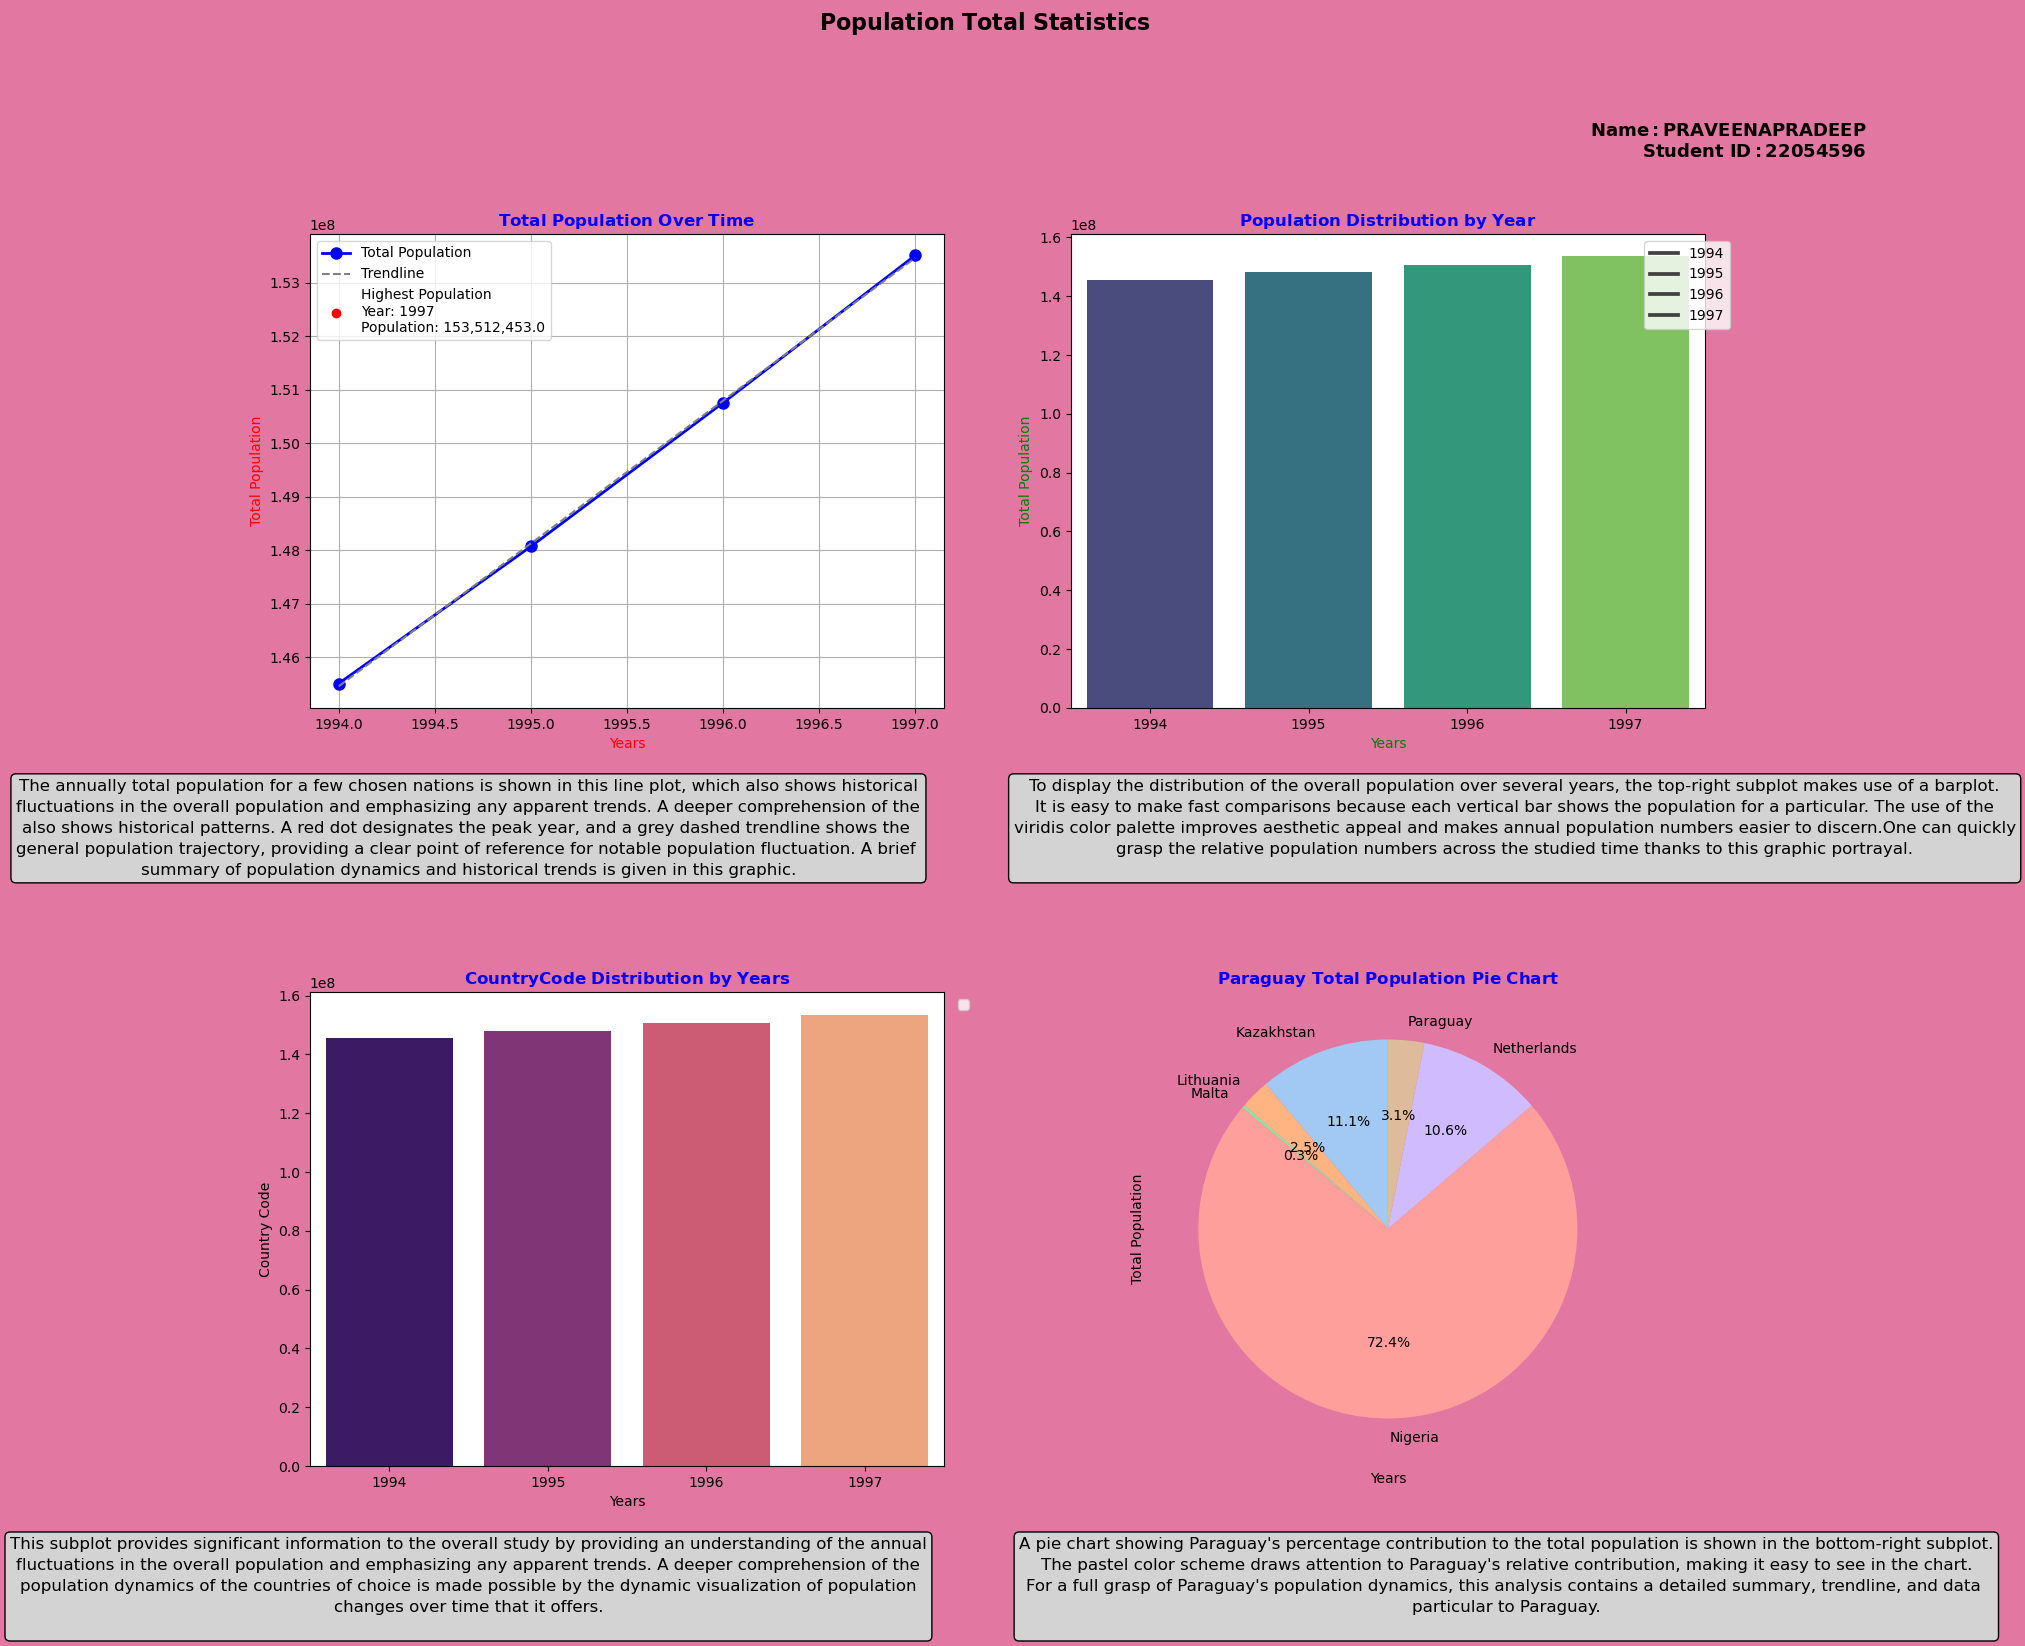

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def read_file(file_path):
    """
    Reads a CSV file, processes and transforms the data, and returns two DataFrames.

    Parameters:
    - file_path (str): The path to the CSV file.

    Returns:
    - df_original (pd.DataFrame): Original DataFrame with raw data.
    - df_t (pd.DataFrame): Transposed and processed DataFrame.
    """
    df = pd.read_csv(file_path, skiprows=4)
    countries = ["Nigeria", "Malta", "Netherlands", "Paraguay", "Lithuania", "Kazakhstan"]
    process = df[df['Country Name'].isin(countries)]
    data = process.drop(['Country Code', 'Indicator Name', 'Indicator Code',
                         '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                         '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                         '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                         '1987', '1988', '1989', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                         '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                         '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
                         'Unnamed: 67'], axis=1).reset_index(drop=True)

    df_t = data.transpose()
    df_t.columns = df_t.iloc[0]
    df_t = df_t.iloc[1:]
    df_t.index = pd.to_numeric(df_t.index)
    df_t['Years'] = df_t.index  
    df_t.index.name = None  

    return data, df_t

def slice_data(df):
    """
    Selects specific columns from the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - df_sliced (pd.DataFrame): DataFrame with selected columns.
    """
    df_sliced = df[['Country Name', '1997']]
    return df_sliced

# Load the dataset
df_original, df_t = read_file('C://Users//HP//Downloads//API_SP.POP.TOTL_DS2_en_csv_v2_6298256//API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv')

# Select only numeric columns
numeric_columns = df_original.select_dtypes(include=np.number).columns
df_numeric = df_original[numeric_columns]

# Display general summary statistics
summary_stats = df_numeric.describe()

# Population Total Data Visualization
plt.figure(figsize=(18, 16), facecolor='#E277A1')
plt.suptitle(r'$\bf{Population\ Total\ Statistics}$', y=1.02, fontsize=16)

# Define a gridspec to control subplot layout with increased hspace
gs = plt.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.2, hspace=0.6)

# Subplot 1: Line plot of total population over time 
ax1 = plt.subplot(gs[0, 0])
population_line = df_numeric.sum().iloc[4:]
population_line.index = population_line.index.astype(int)
population_line.plot(marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Total Population')

# Add a trendline using NumPy's polyfit
z_population = np.polyfit(population_line.index, population_line.values, 1)
p_population = np.poly1d(z_population)
ax1.plot(population_line.index, p_population(population_line.index), linestyle='--', color='gray', label='Trendline')

max_population_year = population_line.idxmax()
max_population_value = population_line.max()
ax1.scatter(max_population_year, max_population_value, color='red', label=f'Highest Population\nYear: {max_population_year}\nPopulation: {max_population_value:,}')

ax1.set_title(r'$\bf{Total\ Population\ Over\ Time}$', color='blue')
ax1.set_xlabel('Years', color='red')
ax1.set_ylabel('Total Population', color='red')
ax1.grid(True)
ax1.legend()

# Summary for Line Plot 
line_plot_summary_population = ("The annually total population for a few chosen nations is shown in this line plot, which also shows historical\n"
    "fluctuations in the overall population and emphasizing any apparent trends. A deeper comprehension of the\n"
    "also shows historical patterns. A red dot designates the peak year, and a grey dashed trendline shows the \n"   
    "general population trajectory, providing a clear point of reference for notable population fluctuation. A brief \n"
    "summary of population dynamics and historical trends is given in this graphic.")

# Add summary below the Line Plot 
bbox_props_line_population = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
ax1.text(0.25, -0.15, line_plot_summary_population, transform=ax1.transAxes, fontsize=12, ha='center', va='top', linespacing=1.5, bbox=bbox_props_line_population)

# Subplot 2: Bar plot for population distribution by year 
ax2 = plt.subplot(gs[0, 1])
sns.barplot(x=population_line.index, y=population_line.values, palette='viridis')
ax2.set_title(r'$\bf{Population\ Distribution\ by\ Year}$', color='blue')
ax2.set_xlabel('Years', color='green')
ax2.legend(population_line.index, loc='upper right', bbox_to_anchor=(1.05, 1))
ax2.set_ylabel('Total Population', color='green')

# Summary for Bar Plot 
bar_plot_summary_population = ("To display the distribution of the overall population over several years, the top-right subplot makes use of a barplot.\n"                         
    "It is easy to make fast comparisons because each vertical bar shows the population for a particular. The use of the\n"
    "viridis color palette improves aesthetic appeal and makes annual population numbers easier to discern.One can quickly\n"
    "grasp the relative population numbers across the studied time thanks to this graphic portrayal.\n")

# Add summary below the Bar Plot 
bbox_props_bar_population = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
ax2.text(0.70, -0.15, bar_plot_summary_population, transform=ax2.transAxes, fontsize=12, ha='center', va='top', linespacing=1.5, bbox=bbox_props_bar_population)

# Subplot 3: Bar plot for population distribution by year 
ax3 = plt.subplot(gs[1, 0])
sns.barplot(x=population_line.index, y=population_line.values, palette='magma')  # Change the palette to 'magma' for the bottom-left plot
ax3.set_title(r'$\bf{Country Code\ Distribution\ by\ Years}$', color='blue')
ax3.set_xlabel('Years', color='black')
ax3.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
ax3.set_ylabel('Country Code', color='black')

# Summary for Bar Plot 
bar_plot_summary_population = ("This subplot provides significant information to the overall study by providing an understanding of the annual\n"
    "fluctuations in the overall population and emphasizing any apparent trends. A deeper comprehension of the\n"
    "population dynamics of the countries of choice is made possible by the dynamic visualization of population\n"
    "changes over time that it offers.\n")

# Add summary below the Bar Plot
bbox_props_bar_population = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
ax3.text(0.25, -0.15, bar_plot_summary_population, transform=ax3.transAxes, fontsize=12, ha='center', va='top', linespacing=1.5, bbox=bbox_props_bar_population)

# Subplot 4: Pie chart based on country name distribution
ax4 = plt.subplot(gs[1, 1])
# Plotting the pie chart specifically for Paraguay
paraguay_pie_chart = df_t[df_t['Paraguay'] != '']
paraguay_pie_chart = paraguay_pie_chart.set_index('Years').astype(float).sum()
paraguay_pie_chart.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), ax=ax4)
ax4.set_title(r'$\bf{Paraguay}\ Total\ Population\ Pie\ Chart $', color='blue')
ax4.set_xlabel('Years', color='black')
ax4.set_ylabel('Total Population', color='black')

# Summary for Pie Chart 
pie_chart_summary_population = ("A pie chart showing Paraguay's percentage contribution to the total population is shown in the bottom-right subplot.\n"
    "The pastel color scheme draws attention to Paraguay's relative contribution, making it easy to see in the chart.\n"
    "For a full grasp of Paraguay's population dynamics, this analysis contains a detailed summary, trendline, and data \n"
    "particular to Paraguay.\n")

# Add summary below the Pie Chart 
bbox_props_pie_population = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
ax4.text(0.75, -0.15, pie_chart_summary_population, transform=ax4.transAxes, fontsize=12, ha='center', va='top', linespacing=1.5, bbox=bbox_props_pie_population)

# Create space between summary boxes
plt.tight_layout()

# Add student name and ID in the top right corner
student_info = r'$\bf{Name: PRAVEENA PRADEEP}$' + '\n' + r'$\bf{Student\ ID: 22054596}$'
plt.gcf().text(0.99, 0.95, student_info, fontsize=13, ha='right', va='top', color='black')

# Save the plot
plt.savefig("22054596.png", dpi=300)
plt.show()
